In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

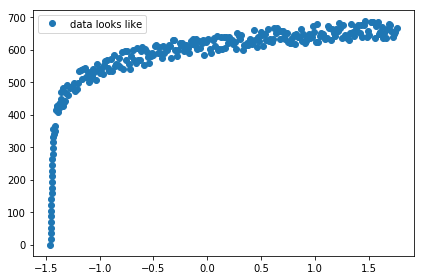

In [63]:
data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',')
X = data[:,:1]
y = data[:,1:2]

X = StandardScaler().fit_transform(X)

X_for_train,X_test,y_for_train,y_test = train_test_split(X,y,test_size = 0.2)

plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

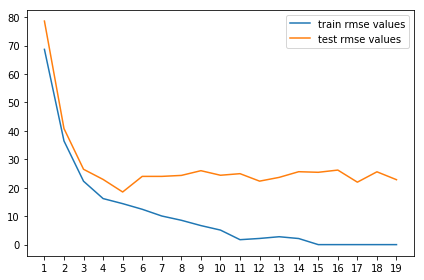

In [70]:
# find optimal parameter for model

# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

max_depth_ = np.arange(1,20,1)

for d in max_depth_:
    X_train,X_cv,y_train,y_cv = train_test_split(X_for_train,y_for_train,test_size = 0.25)
    
    dt_reg = DecisionTreeRegressor(max_depth=d)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_dt_ = dt_reg.predict(X_train)
    y_cv_dt_ = dt_reg.predict(X_cv)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_dt_))
    rmse_cv_ = np.sqrt(mean_squared_error(y_cv, y_cv_dt_))
    
    train_rmse_errors.append(rmse_train_)
    test_rmse_errors.append(rmse_cv_)

default_x_ticks = range(len(max_depth_))   
plt.plot(default_x_ticks, train_rmse_errors, '-', label='train rmse values')
plt.plot(default_x_ticks, test_rmse_errors, '-', label='test rmse values')
plt.xticks(default_x_ticks, max_depth_)
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
#train model using decision tree
r2_ = 0.99
r2_train_ = 0.0
r2_cv_ = 0.0
max_ = 0
while r2_cv_ < float(r2_):
    X_train,X_cv,y_train,y_cv = train_test_split(X_for_train,y_for_train,test_size = 0.25)
    
    dt_reg = DecisionTreeRegressor(max_depth=4)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_dt_ = dt_reg.predict(X_train)
    y_cv_dt_ = dt_reg.predict(X_cv)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_dt_))
    r2_train_ = r2_score(y_train, y_train_predicted_dt_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_dt_)
    # Evaluating test dataset
    rmse_cv_ = np.sqrt(mean_squared_error(y_cv, y_cv_dt_))
    r2_cv_ = r2_score(y_cv, y_cv_dt_)
    mae_cv_ = mean_absolute_error(y_cv, y_cv_dt_)
    
    if r2_cv_ > max_:
        max_ = r2_cv_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_cv_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(rmse_cv_))

R2 score of test is 0.9603032973161871
R2 score of test is 0.9736747200812221
R2 score of test is 0.9779750299315304
R2 score of test is 0.9816127358265131
R2 score of test is 0.9827525515920004
R2 score of test is 0.9853250617952903
R2 score of test is 0.9860720172189575
R2 score of test is 0.9862774639890919
R2 score of test is 0.9891541185888281
R2 score of test is 0.9906167032788872
-------------------------------------------
RMSE of training is 16.037510314105376
R2 score of training  is 0.9801798216927938
MAE of training is 13.371733237509797
RMSE of test is 16.85465493177658
R2 score of test is 0.9906167032788872
MAE of test is 16.85465493177658


R2 score of test is: 0.988274275842197


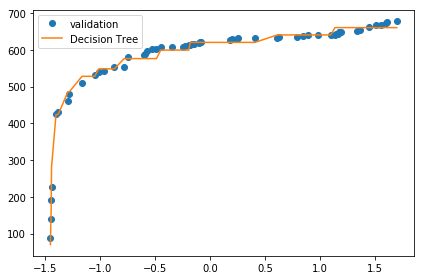

In [75]:
X_test = np.sort(X_test, axis=0)
y_test = np.sort(y_test, axis=0)

y_pred_dt = dt_reg.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
print(f'R2 score of test is: {r2_dt}')

plt.plot(X_test, y_test, 'o', label='validation')
plt.plot(X_test, y_pred_dt, '-', label='Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()